# Problem Statement

### FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most 
popular football (soccer) simulation game by Electronic Arts (EA Sports). ### 
T datasateet provided includes the players data for the Career Mode from FIFA 1to 
FIFA 2 and complete DataAnalysis report on this Project.game.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid  
def set_on():
    pd.set_option('display.max_rows', None)  
    pd.set_option('display.max_columns', None)  

def set_off():
    pd.reset_option('display.max_rows')  
    pd.reset_option('display.max_columns')

In [3]:
fifa_df = pd.read_csv("players_20.csv")
fifa_df = fifa_df.drop_duplicates()  

In [4]:
# list of unwanted columns
unlist = ['sofifa_id','player_url','short_name','long_name','dob','club','player_tags','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits']


#skil list
skillList="attacking_crossing	attacking_finishing	attacking_heading_accuracy	attacking_short_passing	attacking_volleys	skill_dribbling	skill_curve	skill_fk_accuracy	skill_long_passing	skill_ball_control	movement_acceleration	movement_sprint_speed	movement_agility	movement_reactions	movement_balance	power_shot_power	power_jumping	power_stamina	power_strength	power_long_shots	mentality_aggression	mentality_interceptions	mentality_positioning	mentality_vision	mentality_penalties	mentality_composure	defending_marking	defending_standing_tackle	defending_sliding_tackle	goalkeeping_diving	goalkeeping_handling	goalkeeping_kicking	goalkeeping_positioning	goalkeeping_reflexes".split("\t")

# Selection Atributes list
selection_atri= "short_name age height_cm overall potential value_eur team_position joined".split(" ")





# Task 1
>>  Prepare a rank ordered list of top 10 countries with most players. Which 
countries are producing the most footballers that play at this level<br>
>>  Plot the distribution of overall rating vs. age of players. Interpret what is the 
age after which a player stops improving<br>
>> Which type of offensive players tends to get paid the most: the striker, the 
right-winger, or the left-winger 

## This is a ranked ordere list of top 10 countries with most players. Which countries are producing the most footballers that play at this level

In [7]:
RankeOrderdList=fifa_df['nationality'].value_counts().head(10)

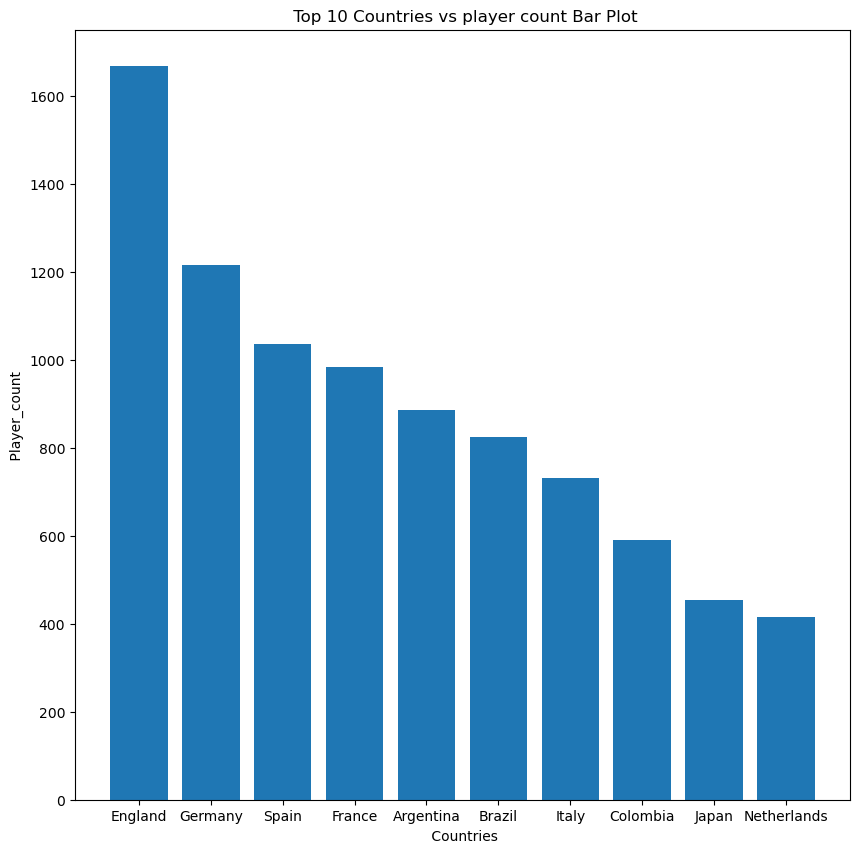

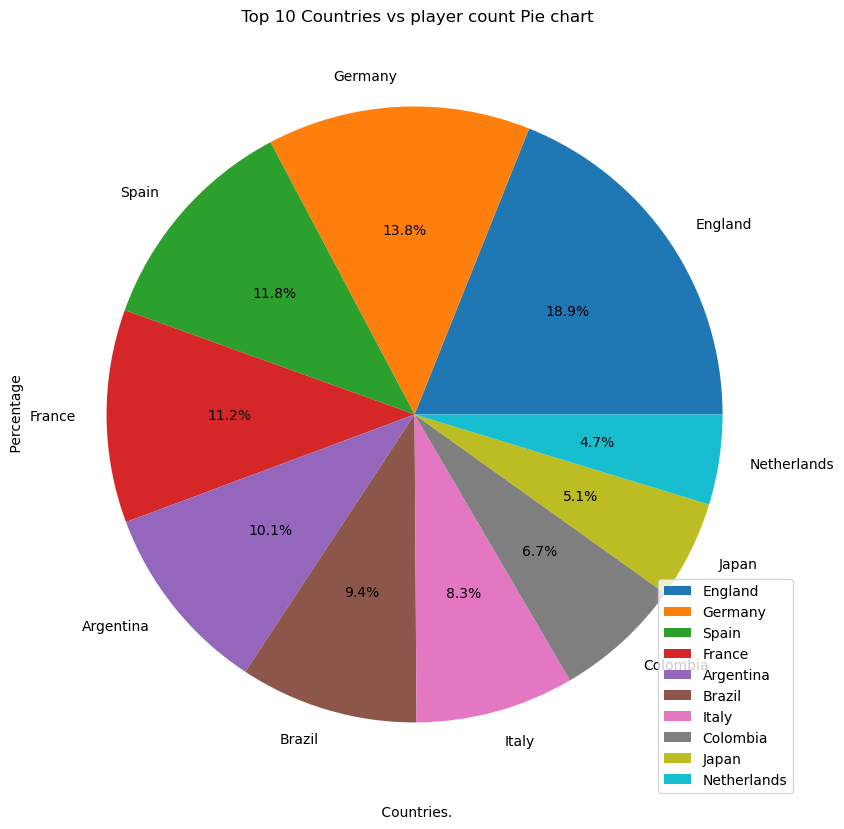

In [8]:
plt.figure(figsize=(10,10))
plt.bar(RankeOrderdList.index,RankeOrderdList.values)  


plt.title(' Top 10 Countries vs player count Bar Plot')  
plt.xlabel(' Countries')  
plt.ylabel(' Player_count ')  

plt.show()  

plt.figure(figsize=(20,10))
plt.pie(RankeOrderdList.values, labels=RankeOrderdList.index,autopct='%1.1f%%') 
plt.title(' Top 10 Countries vs player count Pie chart')  
plt.xlabel(' Countries.')  
plt.ylabel(' Percentage')  
plt.legend(loc="lower right")
 
plt.show()   


## Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving<br> 

>> Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger

In [10]:

age_VS_Overall=fifa_df[['age','overall']]
# age overall

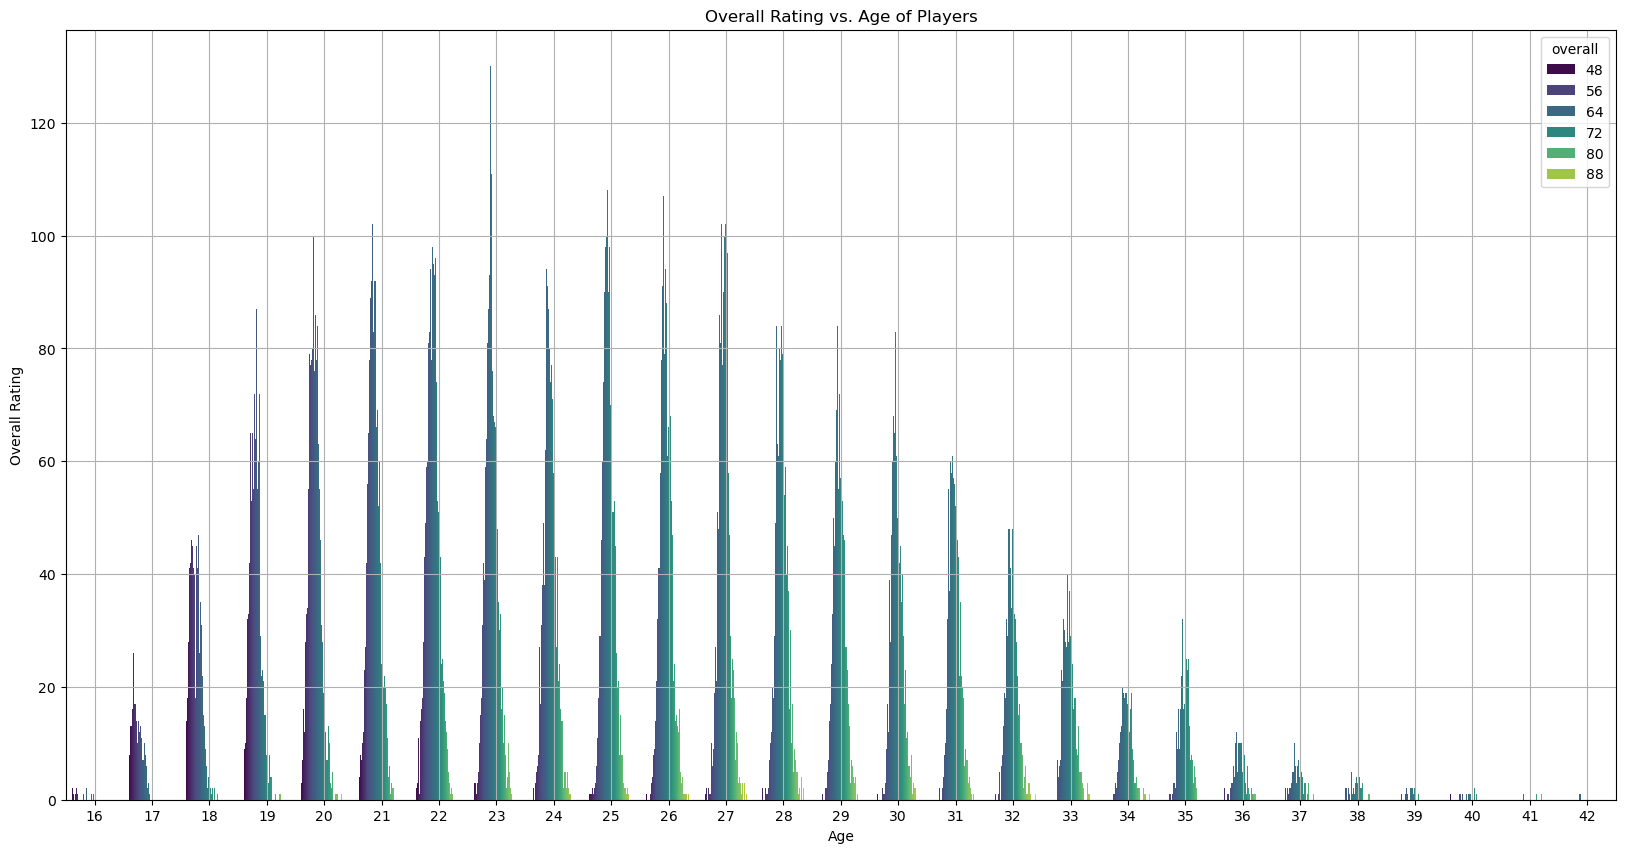

In [11]:
plt.figure(figsize=(20, 10))  
try: 
    sns.countplot(data=age_VS_Overall, x='age', hue='overall', palette='viridis') 
except AttributeError:
    Markdown(" ")
plt.title('Overall Rating vs. Age of Players')  
plt.xlabel('Age')  
plt.ylabel('Overall Rating')  
plt.grid()  

plt.show()


## Based on the provided distribution, we can conclude
>> The lower Overall Rating of young players may be attributed to their limited experience.<br>
>> The overall rating of older players tends to be lower due to a decline in their physical performance.<br>
>> The graph shows a distribution peaking around ages 22-24

In [13]:
position_paid=fifa_df[['team_position','value_eur']]
position_paid=position_paid.loc[fifa_df["team_position"].isin(["ST","LW","RW"])]
position_paid.sort_values("value_eur",ignore_index=True,ascending=False,inplace=True)

<Figure size 1000x1000 with 0 Axes>

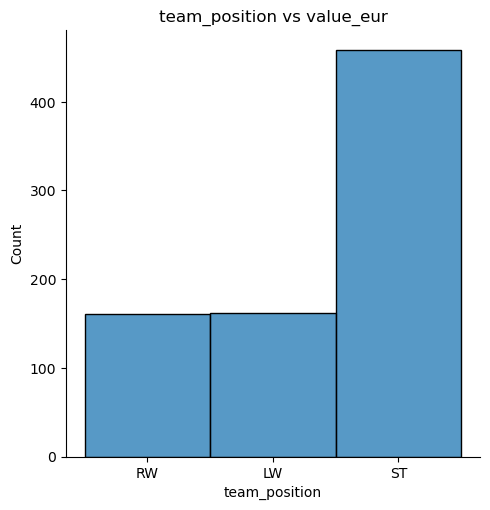

In [14]:
plt.figure(figsize=(10, 10)) 

sns.displot(x='team_position', data=position_paid, palette='viridis')
plt.title("team_position vs value_eur")  
plt.xlabel('team_position')   
plt.show()

In [15]:
position_paid.loc[position_paid['team_position']== 'RW'].head(1)

,team_position,value_eur
0,RW,95500000


In [16]:
position_paid.loc[position_paid['team_position']== 'ST'].head(1)

,team_position,value_eur
3,ST,83000000


In [17]:
position_paid.loc[position_paid['team_position']== 'LW'].head(1)

,team_position,value_eur
2,LW,90000000


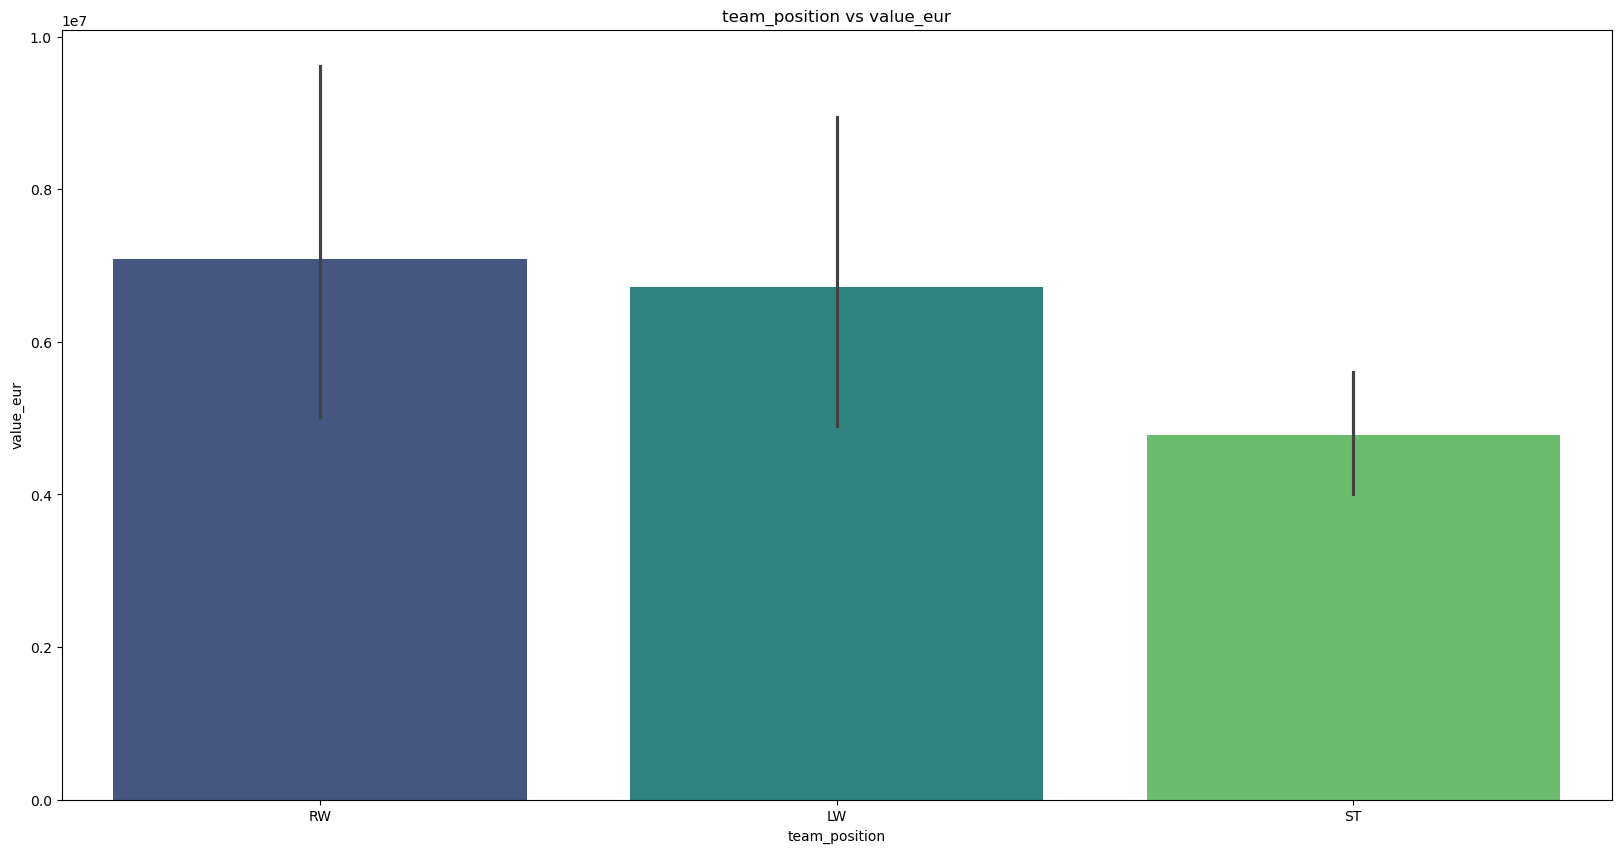

In [18]:
plt.figure(figsize=(20, 10)) 

sns.barplot(x='team_position', y='value_eur', data=position_paid, palette='viridis')
plt.title("team_position vs value_eur")  
plt.xlabel('team_position')  
plt.ylabel('value_eur')  
plt.show()

## The highest-paid player has the right-wing position.

# Task2 
>> Historical comparison between Messi and Ronaldo (what skill attributes 
changed the most during time - compared to real-life stats<br>

>>Ideal budget to create a competitive team (at the level of top n teams in
Europe) and at which point the budget does not allow to buy significantl 
better players for the 11-men lineup. An extra is the same comparison wih 
the Potential attribute for the lineup instead of the Over.e;;

In [21]:
MandR = fifa_df.loc[fifa_df['short_name'].isin(['L. Messi','Cristiano Ronaldo'])]

MandR=MandR.set_index('short_name')[skillList].T

# L. Messi  Cristiano Ronaldo

<Figure size 2000x3000 with 0 Axes>

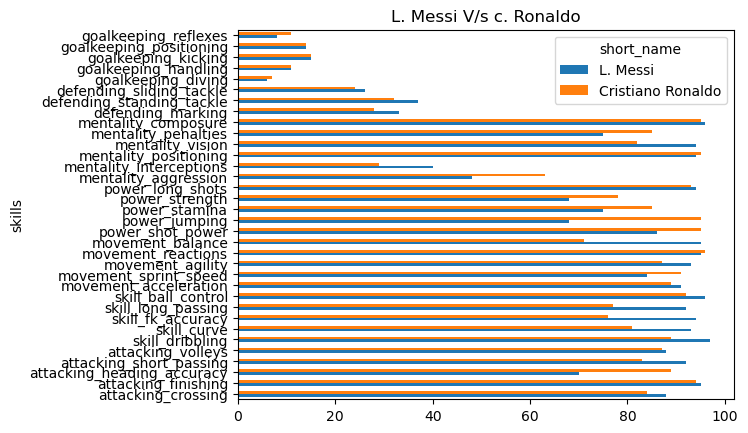

In [22]:
fig = plt.figure()
 
fig.set_figheight(30)
fig.set_figwidth(20)
MandR.plot(kind='barh')
# Adding labels and title
plt.title('L. Messi V/s c. Ronaldo')
plt.ylabel('skills')

plt.show()

## BASIC SKILL DIFFERENCE:  __L. Messi__ and __C. Ronaldo__
>> The most top players in the list

### Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantl better players for the 11-men lineup. An extra is the same comparison wih the Potential attribute for the lineup.

In [25]:
# list of countries who plays fifa
european_countries_fifa = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "England", "Estonia", "Faroe Islands", "Finland", "France", "Georgia",
    "Germany", "Gibraltar", "Greece", "Hungary", "Iceland", "Ireland", "Israel",
    "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Montenegro", "Netherlands", "North Macedonia",
    "Northern Ireland", "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Scotland", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "Ukraine", "Wales"
]

In [26]:

european_fifa=fifa_df.loc[fifa_df['nationality'].isin(european_countries_fifa)]


european_fifa=european_fifa[selection_atri]
# Sorted by overall score.
european_fifa.sort_values("overall",ignore_index=True,ascending=False,inplace=True)

european_fifa=european_fifa.head(11)
# budget in Euro.

In [27]:
european_fifa[["short_name",'value_eur']]

,short_name,value_eur
0,Cristiano Ronaldo,58500000
1,E. Hazard,90000000
2,K. De Bruyne,90000000
3,J. Oblak,77500000
4,M. ter Stegen,67500000
5,V. van Dijk,78000000
6,L. Modrić,45000000
7,Sergio Ramos,31500000
8,A. Griezmann,69000000
9,Sergio Busquets,55000000


In [28]:
Markdown(f"# Total Budget: {european_fifa['value_eur'].sum()}.00€")

# Total Budget: 726500000.00€

# Data Cleaning

In [30]:
fifa_dfML=fifa_df

# drop unwanted columns
fifa_dfML = fifa_dfML.drop(unlist, axis=1)  
null_col=fifa_dfML.columns[fifa_dfML.isnull().any()]

fifa_dfML[null_col].isnull().sum()

release_clause_eur       1298
team_position             240
joined                   1288
contract_valid_until      240
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
rm                       2036
lwb                      2036
ldm       

## Checking The Null Percentage and Drop The columns

In [32]:
def count_nullper(prg):
    high_nullcol=[]
    for i in fifa_dfML[null_col]:
        if(fifa_dfML[i].isnull().sum()/len(fifa_dfML) * 100)> prg:
            high_nullcol.append(i)
    return len(high_nullcol)

for i in range(70,10,-10):
    print(f'<{count_nullper(i)}> Columns are Hving more than {i}% of missing Values')

<6> Columns are Hving more than 70% of missing Values
<6> Columns are Hving more than 60% of missing Values
<6> Columns are Hving more than 50% of missing Values
<6> Columns are Hving more than 40% of missing Values
<6> Columns are Hving more than 30% of missing Values
<6> Columns are Hving more than 20% of missing Values


In [33]:
list_of_droped=[]
prg=50
for i in fifa_dfML[null_col]:
    if(fifa_dfML[i].isnull().sum()/len(fifa_dfML) * 100)> prg:
        fifa_dfML.drop(columns=i,axis=1,inplace=True)
        list_of_droped.append(i)
Markdown(f"# {len(list_of_droped)} are droped: \n>>{list_of_droped}")

# 6 are droped: 
>>['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [34]:
fifa_dfML.shape

(18278, 86)

## Null Column for imputation the NaN

In [36]:
null_col=fifa_dfML.columns[fifa_dfML.isnull().any()]

In [37]:
fifa_dfML[null_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_clause_eur    16980 non-null  float64
 1   team_position         18038 non-null  object 
 2   joined                16990 non-null  object 
 3   contract_valid_until  18038 non-null  float64
 4   pace                  16242 non-null  float64
 5   shooting              16242 non-null  float64
 6   passing               16242 non-null  float64
 7   dribbling             16242 non-null  float64
 8   defending             16242 non-null  float64
 9   physic                16242 non-null  float64
 10  ls                    16242 non-null  object 
 11  st                    16242 non-null  object 
 12  rs                    16242 non-null  object 
 13  lw                    16242 non-null  object 
 14  lf                    16242 non-null  object 
 15  cf                 

## Selecting Null column of  Object Datatype 

In [39]:
obj_null_coll=fifa_dfML[null_col].select_dtypes(include="O")

In [40]:
set_on()
obj_null_coll.head(1)

,team_position,joined,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,RW,2004-07-01,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [41]:
ObjTreat="ls	st	rs	lw	lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb	rcb	rb".split("\t")

In [42]:
for i in  ObjTreat:
    obj_null_coll[i].fillna(0,inplace=True,axis=0)

In [43]:
def numericalevalu(x):
    try:
        return eval(x)
    except ValueError:
        return 0
    except TypeError:
        x=str(x)
    except (ZeroDivisionError,SyntaxError):
        print(f'{x} is not allowed to evaluate')
    return x

for i in ObjTreat:
    obj_null_coll[i]=obj_null_coll[i].apply(numericalevalu).astype('int32')

In [44]:
fifa_dfML[ObjTreat]=obj_null_coll[ObjTreat]
set_off()

In [45]:
obj_null_coll.drop(ObjTreat,inplace=True,axis=1)
del ObjTreat

In [46]:
obj_null_coll.columns

Index(['team_position', 'joined'], dtype='object')

In [47]:
obj_null_coll.isnull().sum()

team_position     240
joined           1288
dtype: int64

In [48]:
#filled with recent valid date 
obj_null_coll['joined'].ffill(inplace=True) 

### Converting the 'joined' column into Datatime datatype

In [50]:
obj_null_coll['joined'] = pd.to_datetime(obj_null_coll['joined'])

In [51]:
# subtract with current Date and calculate the days 
obj_null_coll['joined']=obj_null_coll['joined'].apply(lambda x:(pd.Timestamp.now()-x).days)


In [52]:
obj_null_coll['joined']=obj_null_coll['joined'].apply(lambda x: round(x/365,2))


In [53]:
obj_null_coll['team_position'].mode()


0    SUB
Name: team_position, dtype: object

In [54]:
obj_null_coll['team_position'].fillna('SUB',inplace=True)


### Encoding of Team_position column

Label Encoding
Each unique category is assigned a unique integer.


__Advantages:__

>>Simple and fast to implement.
>>Useful for ordinal data with a natural order.

__Disadvantages:__

>>Introduces ordinal relationships even for nominal data, which can mislead the model (e.g., Blue > Green).Not suitable for high-cardinality variables.


>> __High-Cardinality__ can cause the __Overfitting__ hear we divide each in column with 100 although this will not reduce the High-cardinality but reduce the effect of overfitting 

In [57]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

obj_null_coll['team_position']=pd.DataFrame(label_encoder.fit_transform(obj_null_coll['team_position']),columns=['team_position'])

In [58]:
obj_null_coll['team_position']=obj_null_coll['team_position'].apply(lambda x: x/100)


In [59]:
obj_null_coll.isnull().sum()


team_position    0
joined           0
dtype: int64

In [60]:
# Completed Data cleaning on Objects 
fifa_dfML[obj_null_coll.columns]=obj_null_coll
del obj_null_coll

# Numerical Null values

In [62]:
null_col=fifa_dfML.columns[fifa_dfML.isnull().any()]


In [63]:
num_null_coll=fifa_dfML[null_col].select_dtypes(include="number")


In [64]:
num_null_coll.head()


,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic
0,195800000.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0
1,96500000.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0
2,195200000.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0
3,164700000.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
4,184500000.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0


## Filling "release_clause_eur column" with mean value 

In [66]:
num_null_coll['release_clause_eur'].fillna(int(num_null_coll['release_clause_eur'].mean()),inplace=True)


### Investigation for "contract_valid_until"  column

In [68]:
fifa_dfML[["joined",'contract_valid_until']].head()


,joined,contract_valid_until
0,20.47,2021.0
1,6.44,2022.0
2,7.38,2022.0
3,10.43,2023.0
4,5.47,2024.0


In [69]:
fifa_dfML[["joined",'contract_valid_until']].loc[fifa_dfML["joined"] == fifa_dfML["joined"].min()]


,joined,contract_valid_until
304,5.33,2022.0
15042,5.33,2023.0
15421,5.33,2023.0
15553,5.33,2023.0
16742,5.33,2023.0
18065,5.33,2023.0


In [70]:
fifa_dfML[["joined",'contract_valid_until']].loc[fifa_dfML["joined"] == fifa_dfML["joined"].max()]


,joined,contract_valid_until
9502,26.98,2022.0


In [71]:
num_null_coll['contract_valid_until'].fillna(2024.0,inplace=True)


In [72]:
null_col=num_null_coll.columns[num_null_coll.isnull().any()]


In [73]:
# now the rest null values are of rank type so fill with 0
for i in null_col:
    num_null_coll[i].fillna(0,inplace=True)

In [74]:
num_null_coll.isnull().sum()


release_clause_eur      0
contract_valid_until    0
pace                    0
shooting                0
passing                 0
dribbling               0
defending               0
physic                  0
dtype: int64

In [75]:
fifa_dfML[num_null_coll.columns]=num_null_coll


In [76]:
set_on()
fifa_dfML.isnull().sum()


age                           0
height_cm                     0
weight_kg                     0
nationality                   0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
real_face                     0
release_clause_eur            0
team_position                 0
joined                        0
contract_valid_until          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

## Encoding of Catagorical columns

In [78]:
objdf=fifa_dfML.select_dtypes("O")
set_off()

In [79]:
objdf.head(1)
# player_positions preferred_foot body_type nationality

,nationality,player_positions,preferred_foot,work_rate,body_type,real_face
0,Argentina,"RW, CF, ST",Left,Medium/Low,Messi,Yes


In [80]:
# after finding Unique Value
work_rateEncoding={
'Medium/Low':2, 
'High/Low':2, 
'High/Medium':3, 
'Medium/Medium':3,
'High/High':4, 
'Medium/High':3, 
'Low/High':2, 
'Low/Medium':2, 
'Low/Low':0
}
# map the above encodings

objdf['work_rate']=objdf['work_rate'].map(work_rateEncoding)

In [81]:
fifa_dfML[objdf.columns]=objdf

# no need of Nationality, redundant values of player_positions, no need of preferred_food, body_type,real_face

fifa_dfML.drop(fifa_dfML.select_dtypes("O").columns,inplace=True,axis=1)

In [143]:
fifa_dfML.head()
#fifa_dfML.to_csv("fifa20pre.csv")


# Dataset is ready for Machine Learning


## Clustering Approach

In [139]:
# sFIFADf=fifa_dfML_uncorr # Not a good Clustering idea

sFIFADf=fifa_dfML

In [141]:
# standard Scaller for
def standardScallerTransform(df):
    from sklearn.preprocessing import MinMaxScaler 
    scaler= MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [143]:
sFIFADf=standardScallerTransform(sFIFADf)


In [145]:
sFIFADf.head()
# All values are in between 0 and 1

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.615385,0.285714,0.366667,1.000000,0.978261,0.905213,1.000000,1.00,0.75,0.75,...,0.795455,0.755556,0.755556,0.755556,0.795455,0.747126,0.600000,0.600000,0.600000,0.747126
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.554502,0.716814,1.00,0.75,1.00,...,0.772727,0.711111,0.711111,0.711111,0.772727,0.735632,0.622222,0.622222,0.622222,0.735632
2,0.423077,0.387755,0.300000,0.956522,0.934783,1.000000,0.513274,1.00,1.00,1.00,...,0.784091,0.711111,0.711111,0.711111,0.784091,0.735632,0.544444,0.544444,0.544444,0.735632
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.734597,0.221239,0.50,0.50,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.853081,0.831858,0.75,0.75,0.75,...,0.784091,0.733333,0.733333,0.733333,0.784091,0.735632,0.577778,0.577778,0.577778,0.735632


# K-Means

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

## Hyperpaarameter tunning for K-Means

In [149]:
# declearing excepted Parameters
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 400],
    'n_init': [10, 20]
}

# Theis function return the best paarameter list and the silhouette score
def kmeans_hyperparameter_tuning(X, param_grid):
    
    best_score = -1  # Initialize the best score
    best_params = None

    
    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(X)

        score = silhouette_score(X, labels)
        best_params = params

        if score > best_score:
            best_score = score
            best_params = params

    
    return best_params


In [151]:
best_params= kmeans_hyperparameter_tuning(sFIFADf, param_grid)

Markdown(f"# Best Best_param_grid = {best_params}")

# Best Best_param_grid = {'init': 'random', 'max_iter': 400, 'n_clusters': 5, 'n_init': 20}

## Applying k-Means With Best Parameter

In [153]:
Best_param_grid = {'init': 'random', 'max_iter': 400, 'n_clusters': 5, 'n_init': 20}

kmeans = KMeans(**Best_param_grid, random_state=42)
kmeans.fit(sFIFADf)
labels = kmeans.labels_
score = silhouette_score(sFIFADf, labels)
centroids = kmeans.cluster_centers_

## Ploting Some Columns with respect to Labels 

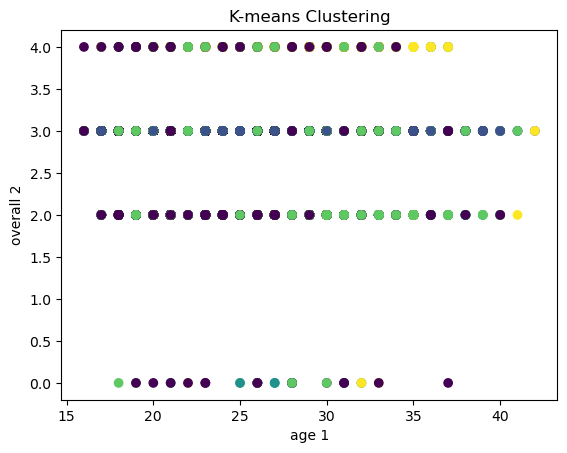

In [155]:
# Plotting  

plt.scatter(fifa_dfML['age'], fifa_dfML['work_rate'], c=labels, cmap='viridis')   
plt.title('K-means Clustering')  
plt.xlabel('age 1')  
plt.ylabel('overall 2')  
plt.show()  

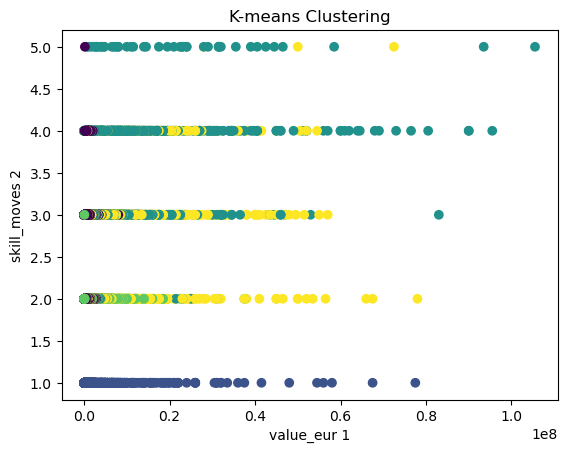

In [157]:
plt.scatter(fifa_dfML['value_eur'], fifa_dfML['skill_moves'], c=labels, cmap='viridis')   
plt.title('K-means Clustering')  
plt.xlabel('value_eur 1')  
plt.ylabel('skill_moves 2')  
plt.show()  

## Evaluation:

In [161]:
# Check evaluation scores  
print(f'Silhouette Score: {round(score*100,3)}')  



# Cluster sizes  
unique, counts = np.unique(labels, return_counts=True)  
cluster_sizes = dict(zip(unique, counts))  
print(f'Cluster sizes: {cluster_sizes}')  

Silhouette Score: 25.177
Cluster sizes: {0: 3695, 1: 2036, 2: 2970, 3: 4474, 4: 5103}


# DBSCAN

## Hyperpaarameter tunning for DBSCAN

In [167]:
from sklearn.cluster import DBSCAN

param_grid={
            'eps':[0.5,0.3],
            'min_samples':[3,5,7,9], 
            'leaf_size':[20,30,40],
}
   

flag=False
best_params = {}
best_score = -1
best_labels = {}

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(sFIFADf)
    
    # Need more then 1 cluster
    # set is used for uniqunes on lavel
    if len(set(labels)) > 1:
        score = silhouette_score(sFIFADf, labels)
        if score > best_score:
            flag=True
            best_score = score
            best_params = params
            best_labels = labels
if flag==False:
    best_score = -1
    best_params = {}
    Markdown(f'Provide more options for Hyperpameters or Change the Model')
    



In [169]:
print(f"# BestParameter={best_params}")
print(f"# Score={best_score}")

# BestParameter={'eps': 0.3, 'leaf_size': 20, 'min_samples': 3}
# Score=-0.05337852078340872


In [171]:
BestParameter={'eps': 0.3, 'leaf_size': 20, 'min_samples': 3}
# preperaring Model using default parameters
dbS = DBSCAN(**BestParameter).fit(sFIFADf)  
labels = dbS.labels_

## Evaluation

In [173]:
len(set(labels))
# Cluster sizes  
unique, counts = np.unique(labels,return_index=True)  

cluster_sizes = dict(zip(unique, counts))  
print(f'Cluster sizes: {cluster_sizes}')

Cluster sizes: {-1: 0, 0: 13185, 1: 17863}


In [175]:
score = silhouette_score(sFIFADf, labels)
score

-0.05337852078340872

## Ploting Some Columns with respect to labels for DBSCAN

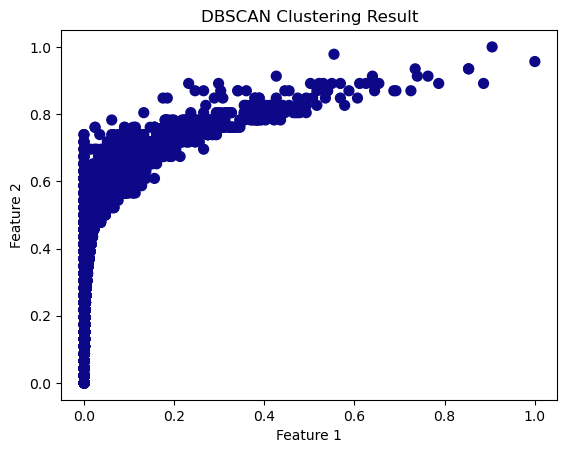

In [177]:
plt.scatter(sFIFADf['value_eur'], sFIFADf['overall'], c=labels, cmap='plasma', marker='o', s=50)  
plt.title('DBSCAN Clustering Result')  
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.show()  

# Now let's Predict the "Overall" for this Dataset

In [179]:
fifa_dfML_uncorr=fifa_dfML
fifa_dfML.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,94,95500000,565000,5,4,4,...,70,68,68,68,70,65,54,54,54,65
1,34,187,83,93,93,58500000,405000,5,4,5,...,68,64,64,64,68,64,56,56,56,64
2,27,175,68,92,92,105500000,290000,5,5,5,...,69,64,64,64,69,64,49,49,49,64
3,26,188,87,91,93,77500000,125000,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,28,175,74,91,91,90000000,470000,4,4,4,...,69,66,66,66,69,64,52,52,52,64


## Remove the Corelation columns

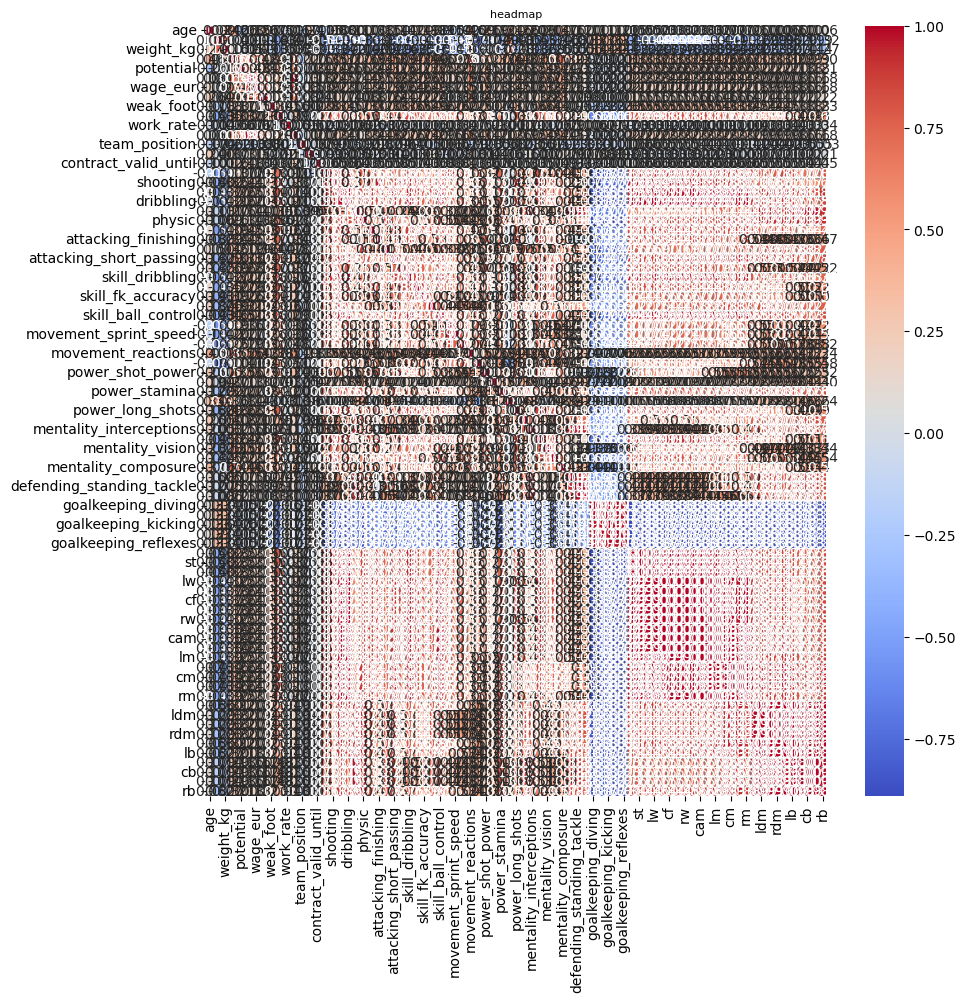

In [181]:
# correlation Matrices
corr=fifa_dfML_uncorr.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, fmt=".2f", annot=True, cmap="coolwarm", linewidths=0.5, linecolor="gray")

plt.title("headmap", fontsize=8)

# Show the heatmap
plt.show()


In [183]:
# Set a threshold for high correlation  
threshold = 0.5  

# Get the upper triangle
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  

# Find columns with a correlation greater than the threshold  
high_corr_var = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]


fifa_dfML_uncorr=fifa_dfML_uncorr.drop(high_corr_var,axis=1)

In [193]:
fifa_dfML.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,94,95500000,565000,5,4,4,...,70,68,68,68,70,65,54,54,54,65
1,34,187,83,93,93,58500000,405000,5,4,5,...,68,64,64,64,68,64,56,56,56,64
2,27,175,68,92,92,105500000,290000,5,5,5,...,69,64,64,64,69,64,49,49,49,64
3,26,188,87,91,93,77500000,125000,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,28,175,74,91,91,90000000,470000,4,4,4,...,69,66,66,66,69,64,52,52,52,64


In [195]:
fifa_dfML_uncorr.head()

,age,height_cm,overall,weak_foot,skill_moves,work_rate,team_position,joined,contract_valid_until,power_jumping
0,32,170,94,4,4,2,0.25,20.47,2021.0,68
1,34,187,93,4,5,2,0.14,6.44,2022.0,95
2,27,175,92,5,5,3,0.00,7.38,2022.0,61
3,26,188,91,3,1,3,0.05,10.43,2023.0,78
4,28,175,91,4,4,3,0.14,5.47,2024.0,56


In [191]:
X=fifa_dfML_uncorr.loc[: , fifa_dfML_uncorr.columns!="overall"]
y=fifa_dfML_uncorr.loc[: , fifa_dfML_uncorr.columns=="overall"]

In [197]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




## Only X_train

In [199]:
import math
def plotSize(rowSize,columnSize):
    return (math.ceil(columnSize/rowSize),rowSize)

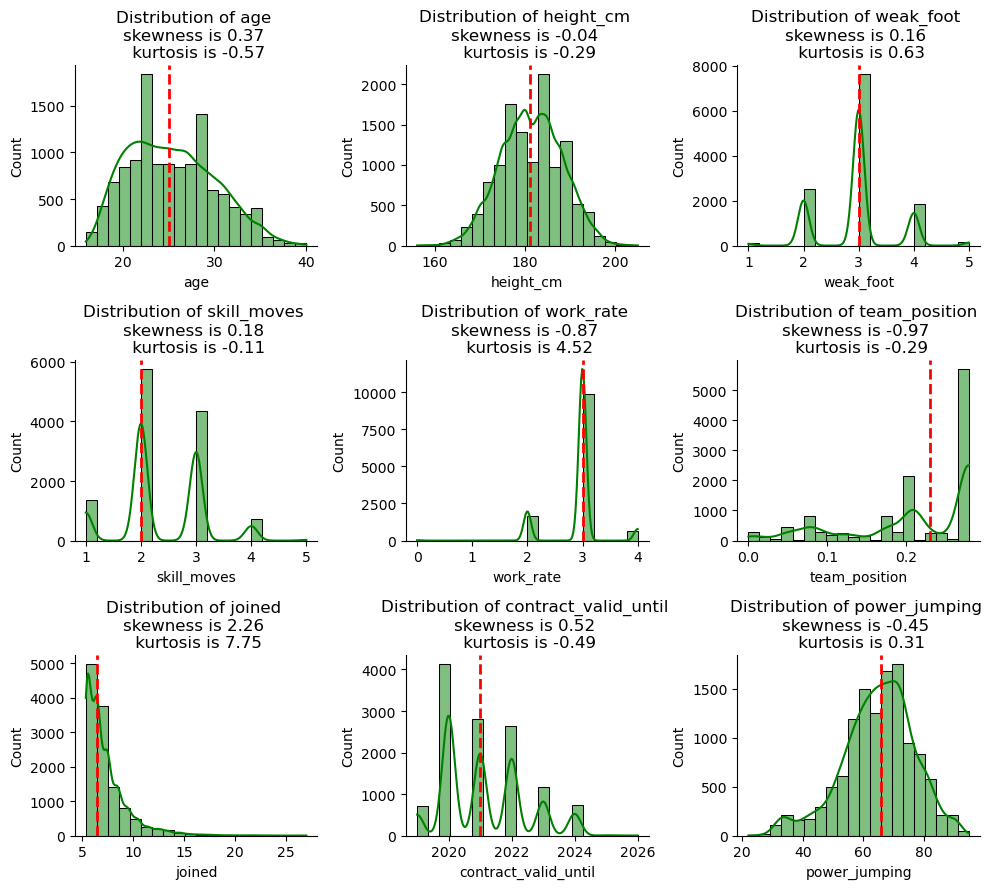

In [201]:
_ ,cold=X_train.shape
plt.figure(figsize=(10,cold)) 

pltSize=plotSize(3,cold)

for i, column in enumerate(X_train):
    plt.subplot(pltSize[0],pltSize[1],i+1)
    sns.histplot(data=X_train, x=column, kde=True,bins=20,color='green')
    
    #plt.axvline(x=y_train.median(), color="green", linestyle='--', linewidth=2)
    plt.axvline(x=X_train[column].median(), color="red", linestyle='--', linewidth=2)

    desc=f'skewness is {X_train[column].skew():.2f} \n kurtosis is {X_train[column].kurtosis():.2f}'
    plt.title(f'Distribution of {column} \n{desc}')
    sns.despine()
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


<Figure size 1000x900 with 0 Axes>

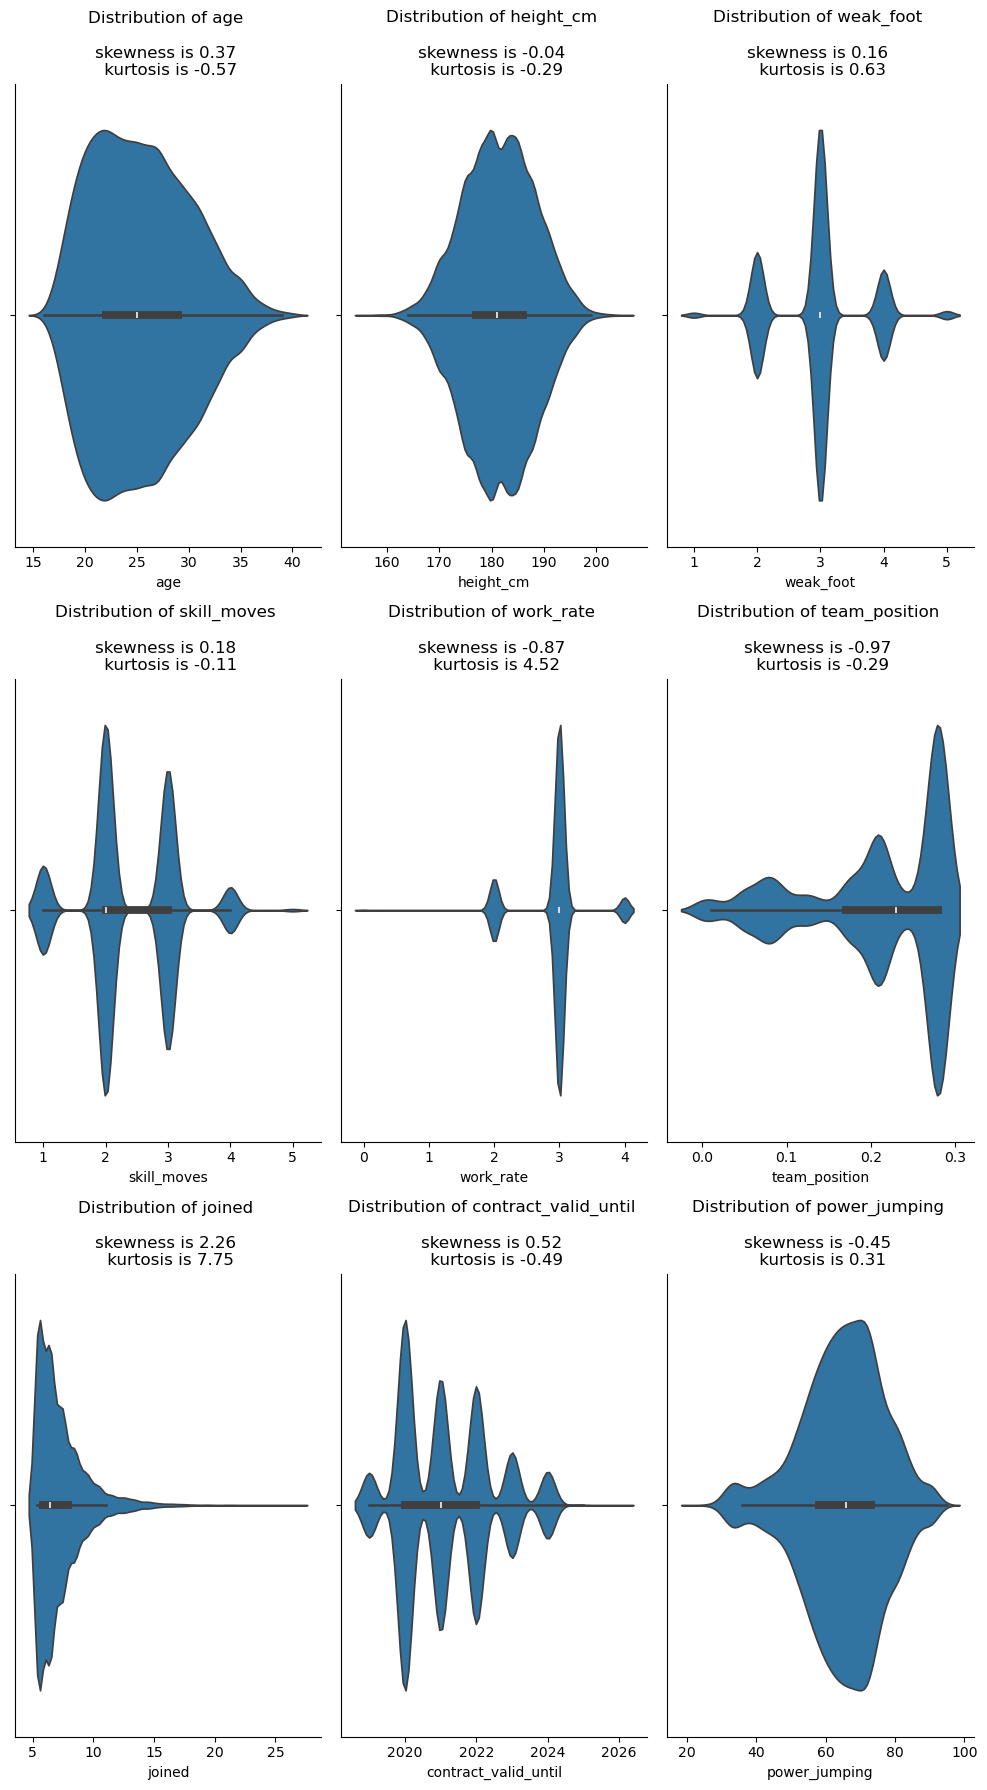

In [203]:
_ ,cold=X_train.shape
plt.figure(figsize=(10,cold)) 

pltSize=plotSize(3,cold)

plt.figure(figsize=(10,cold*2)) 
for i, column in enumerate(X_train):
    plt.subplot(pltSize[0],pltSize[1], i+1)
    sns.violinplot(data=X_train, x=column) 
    # sns.histplot(data=num_col, x=column, kde=True,bins=20,color='green')
    desc=f'skewness is {X_train[column].skew():.2f} \n kurtosis is {X_train[column].kurtosis():.2f}'
    plt.title(f'Distribution of {column} \n\n{desc}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

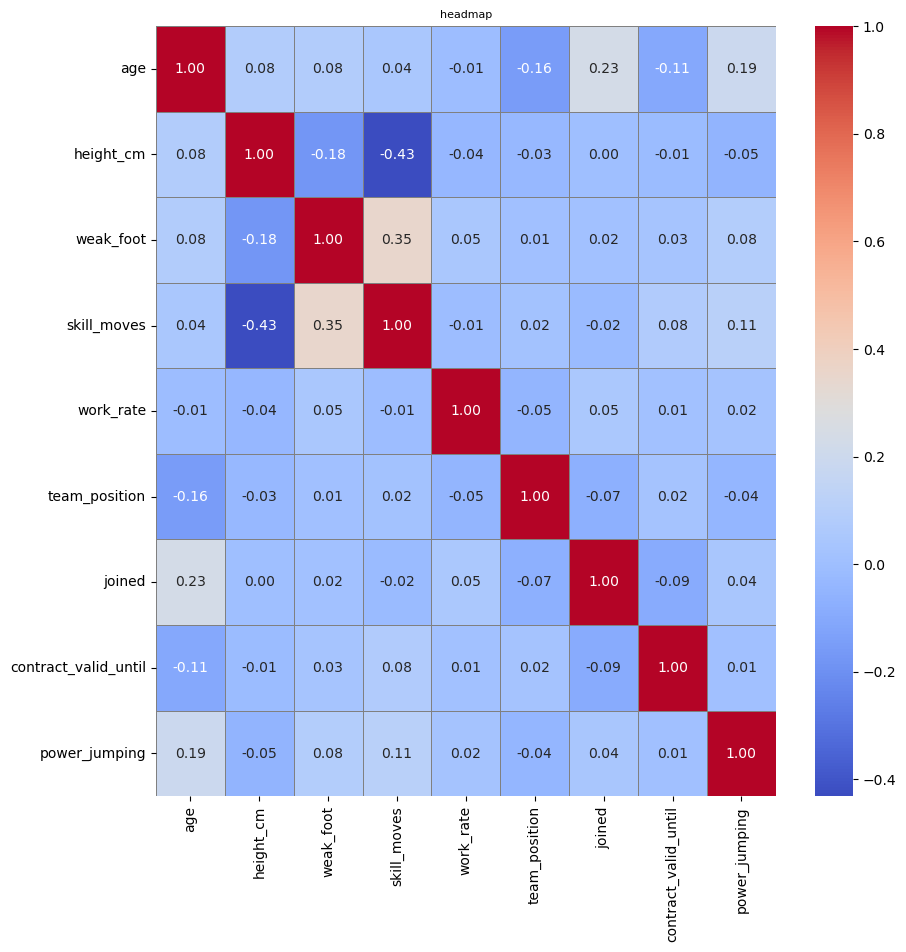

In [205]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), fmt=".2f", annot=True, cmap="coolwarm", linewidths=0.5, linecolor="gray")

plt.title("headmap", fontsize=8)

# Show the heatmap
plt.show()

In [207]:
def NormalizationMethod(df,method='_'):
    if method == 'min_maxScaler':
        
        from sklearn.preprocessing import MinMaxScaler
        
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(df)
        
        return pd.DataFrame(normalized_data, columns=df.columns)
    elif method == 'StandardScaler':
        from sklearn.preprocessing import StandardScaler
        
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(df)
        
        return pd.DataFrame(standardized_data, columns=df.columns)
    elif method == 'RobustScaler':
        from sklearn.preprocessing import RobustScaler
        
        scaler = RobustScaler()
        robust_scaled_data = scaler.fit_transform(df)
        
        return pd.DataFrame(robust_scaled_data, columns=df.columns)
    else:
        raise ValueError("Invalid method. Choose Min_Max Scaler , StandardScaler , RobustScaler.")
    return df


In [209]:
NsX_train=NormalizationMethod(X_train,'min_maxScaler') # we don't want negative numbers 

# Regression models

In [211]:
#Evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score 

## This is SVR

In [213]:
from sklearn.svm import SVR

SvrParameter={
        'kernel':['poly', 'rbf', 'sigmoid'],
        'degree':[2,3],
        'epsilon':[0.05,0.1,0.15],
        'gamma':['scale','auto'],
        'C':[0.5,1.0],
}

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
def hyperparameter_tuning(X, param_grid, model, y=None):
    grid = ParameterGrid(param_grid)  

    # Set up the GridSearchCV  
    grid_search = GridSearchCV(estimator=model,   
                               param_grid=param_grid,   
                               scoring='accuracy',   
                               cv=3,  
                               verbose=2,  
                               n_jobs=-1)  
    grid_search.fit(X, y)  
    
    # Get the best parameters and score  
    best_params = grid_search.best_params_  
    best_score = grid_search.best_score_ 
    return best_params,best_score

# Initialising hyperparameter tuning function
svr=SVR()
best_params,best_score=hyperparameter_tuning(NsX_train,SvrParameter,svr,y=y_train)

print(best_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'C': 0.5, 'degree': 2, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'poly'}


In [215]:
bestpara={'C': 0.5, 'degree': 2, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'poly'}

svr=SVR(**bestpara)
svr.fit(NsX_train,y_train)

SVR(C=0.5, degree=2, epsilon=0.05, kernel='poly')

In [217]:
predicted = svr.predict(X_test)
scoreRMSE = np.sqrt(mean_squared_error(y_test, predicted))
scoreR2 = r2_score(y_test, predicted) 

print(f"R2 score: {scoreR2}")
print(f"RMSE score: {scoreRMSE}")

R2 score: -4575076225060.731
RMSE score: 14797519.327767588


## Linear Regression

In [219]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

predicted = lr.predict(X_test)
scoreRMSE = np.sqrt(mean_squared_error(y_test, predicted))
scoreR2 = r2_score(y_test, predicted) 



In [252]:
print(f"R2 score: {scoreR2*100:.2f}")
print(f"RMSE score: {scoreRMSE:.2f}")

R2 score: 60.15
RMSE score: 4.99


## XGBoostRegressor

In [223]:
from xgboost import XGBRegressor


xgb = XGBRegressor(random_state=42)

param= {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param,
    cv=3,  
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=1,  
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  # Convert back to RMSE

print("Best Parameters:", best_params)
print("Best Cross-Validated RMSE:", best_score)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1.0; total time

In [254]:
# Train the best model on the full training set
best_model = grid_search.best_estimator_
print(f'Best parameters: {best_model}')
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scoreR2 = r2_score(y_test, y_pred) 

print(f"Test RMSE error:{_rmse :.2f}")
print(f"Test R2 socre:{scoreR2*100:.2f}")

Best parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Test RMSE error:4.37
Test R2 socre:60.15


# Hyperparameter Tuning>>
Hyperparameter tuning is the common machine learning process of selecting the data, features, model architecture, and learning algorithm to yield an effective model. Hyperparameter tuning is a challenging problem given the potentially large number of hyperparameters to consider. 

# Challanges
>> High cordinal Data<br>

>> Outliers presence<br>

>> Multi-Dimensionality

## <center><u>**End Of Notebook** </center>